In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/dataset1.csv")
df.head(5)

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['Pattern Category'],random_state=42)

In [5]:
X = df['text']
y = df['label']

In [6]:
!pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB

In [7]:
from textattack.augmentation import WordNetAugmenter
wordnet_aug = WordNetAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: wordnet_aug.augment(x) if isinstance(x, str) else x)

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba

In [8]:
df_original = df.copy()
# Replace 'text' column in the original DataFrame with augmented text
df['text'] = df['augmented_text']

# Concatenate the original and augmented DataFrames
result_df = pd.concat([df_original, df], ignore_index=True)

# Drop the 'augmented_text' column if you no longer need it
result_df.drop(columns=['augmented_text'], inplace=True)

result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
4707,1304,[ Bra Panty primed ],0,Not Dark Pattern
4708,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
4709,1081,[Only iv left in stock],1,Scarcity
4710,767,[Trending histrion],0,Not Dark Pattern


In [9]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: eda_aug.augment(x) if isinstance(x, str) else x)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
df_original = result_df.copy()
# Replace 'text' column in the original DataFrame with augmented text
df['text'] = df['augmented_text']

# Concatenate the original and augmented DataFrames
result_df = pd.concat([df_original, df], ignore_index=True)

# Drop the 'augmented_text' column if you no longer need it
result_df.drop(columns=['augmented_text'], inplace=True)

result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
7063,1304,[ Bra Panty primed ],0,Not Dark Pattern
7064,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
7065,1081,[Only iv left in stock],1,Scarcity
7066,767,[Trending histrion],0,Not Dark Pattern


In [11]:
from textattack.augmentation import CharSwapAugmenter
charswap_aug = CharSwapAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: charswap_aug.augment(x) if isinstance(x, str) else x)

In [12]:
df_original = result_df.copy()
# Replace 'text' column in the original DataFrame with augmented text
df['text'] = df['augmented_text']

# Concatenate the original and augmented DataFrames
result_df = pd.concat([df_original, df], ignore_index=True)

# Drop the 'augmented_text' column if you no longer need it
result_df.drop(columns=['augmented_text'], inplace=True)

In [13]:
result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
9419,1304,[ Bra Panty primed ],0,Not Dark Pattern
9420,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
9421,1081,[Only iv left in stock],1,Scarcity
9422,767,[Trending histrion],0,Not Dark Pattern


In [14]:
%pip install transformers
%pip install tensorflow-text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.2 MB/s eta 0:00:00


In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [16]:
result_df['text'] = result_df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [17]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [18]:
X = result_df['text']
y = result_df['label']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [21]:
pooled_output = outputs['pooled_output']
dropout = tf.keras.layers.Dropout(0.1, name="dropout")(pooled_output)
output = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(dropout)

In [22]:
model = tf.keras.Model(inputs=[text_input], outputs=[output])

In [23]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [24]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
236/236 [==============================] - 89s 318ms/step - loss: 0.5700 - accuracy: 0.7225 - precision: 0.7218 - recall: 0.7191
Epoch 2/15
236/236 [==============================] - 76s 324ms/step - loss: 0.4611 - accuracy: 0.8008 - precision: 0.7994 - recall: 0.8002
Epoch 3/15
236/236 [==============================] - 77s 325ms/step - loss: 0.4167 - accuracy: 0.8286 - precision: 0.8222 - recall: 0.8362
Epoch 4/15
236/236 [==============================] - 78s 329ms/step - loss: 0.3855 - accuracy: 0.8453 - precision: 0.8407 - recall: 0.8501
Epoch 5/15
236/236 [==============================] - 78s 328ms/step - loss: 0.3702 - accuracy: 0.8505 - precision: 0.8474 - recall: 0.8530
Epoch 6/15
236/236 [==============================] - 77s 327ms/step - loss: 0.3500 - accuracy: 0.8611 - precision: 0.8601 - recall: 0.8608
Epoch 7/15
236/236 [==============================] - 77s 328ms/step - loss: 0.3407 - accuracy: 0.8662 - precision: 0.8661 - recall: 0.8645
Epoch 8/15
236/236 [

In [25]:
model.evaluate(X_test, y_test)

59/59 [==============================] - 21s 329ms/step - loss: 0.2817 - accuracy: 0.8966 - precision: 0.9496 - recall: 0.8422


[0.28167757391929626,
 0.8965517282485962,
 0.9496487379074097,
 0.8421599268913269]

In [26]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

59/59 [==============================] - 19s 314ms/step


In [27]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, ..., 1, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[879,  43],
       [152, 811]])

Text(50.722222222222214, 0.5, 'Truth')

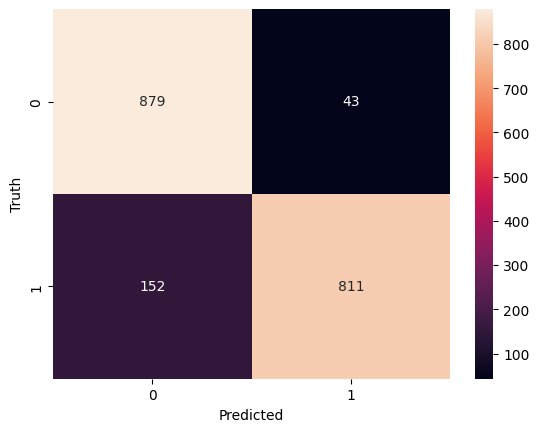

In [29]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       922
           1       0.95      0.84      0.89       963

    accuracy                           0.90      1885
   macro avg       0.90      0.90      0.90      1885
weighted avg       0.90      0.90      0.90      1885



In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predicted)
print(accuracy)

0.896551724137931


In [32]:
import os
print(os.getcwd())

/content


In [33]:
import joblib

# Assuming 'model' is your trained model
with open('/content/sample_data/bertmodel.joblib', 'wb') as f:
    joblib.dump(model, f)
